<a href="https://colab.research.google.com/github/Nathnaelc/CS130-Replication/blob/main/CS130_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# List of packages
packages <- c('Synth',  'tidyverse', 'skimr')

# Function to install and load packages
install_and_load_packages <- function(packages) {
  for(package in packages){
    # Install the package if it's not already installed
    if(!package %in% installed.packages()){
      install.packages(package, dependencies = TRUE)
    }
    # Load the package
    library(package, character.only = TRUE)
  }
}

# Call the function with your list of packages
install_and_load_packages(packages)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘nloptr’, ‘pracma’, ‘kernlab’, ‘optimx’, ‘rgenoud’


##
## Synth Package: Implements Synthetic Control Methods.


## See https://web.stanford.edu/~jhain/synthpage.html for additional information.



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘rex’, ‘extrafontdb’, ‘Rttf2pt1’, ‘covr’, ‘extrafont’




In [ ]:
# Load necessary libraries
library(Synth)
library(tidyverse)

# install.packages("Synth")

# Import dataset from Google Sheets
data_url <- "https://docs.google.com/spreadsheets/d/e/2PACX-1vRMhkAyj2d1KVfQaqx3mjwp6amxTGLsKBRgKhQxbC2dxGk-CUoXhGnOIT8tvJ3NtJga5xxU-yQkNyB4/pub?gid=223669760&single=true&output=csv"
dataset <- read.csv(data_url)

# Display the first few rows of the dataset to ensure it's loaded correctly
# head(dataset)


In [ ]:
# Convert the Time variable to a numeric variable
dataset$Time <- as.numeric(as.character(dataset$year))

# Convert the Region variable to a numeric variable
dataset$RegionID <- as.numeric(factor(dataset$region, levels = unique(dataset$region)))
print(names(dataset))
head(dataset)
# str(dataset)

 [1] "region"                          "year"                           
 [3] "total_economically_active"       "total_in_employment"            
 [5] "unemployed"                      "employment_rate"                
 [7] "total_economically_active_16_64" "total_in_employment_16_64"      
 [9] "unemployed_16_64"                "economically_inactive_16_64"    
[11] "economic_activity_rate_16_64"    "employment_rate_16_64"          
[13] "unemployment_rate_16_64"         "treated"                        
[15] "RegionID"                        "Time"                           


,region,year,total_economically_active,total_in_employment,unemployed,employment_rate,total_economically_active_16_64,total_in_employment_16_64,unemployed_16_64,economically_inactive_16_64,economic_activity_rate_16_64,employment_rate_16_64,unemployment_rate_16_64,treated,RegionID,Time
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,London,1993,3455555,2983147,472407.7,55.41419,3399061,2930256,468805.6,1068913,76.07635,65.58388,13.793905,1,1,1993
2,London,1994,3429850,2984659,445191.6,55.36414,3369477,2927442,442034.6,1113806,75.15660,65.29611,13.119007,1,1,1994
3,London,1995,3462754,3049464,413289.8,56.31126,3406124,2995529,410594.5,1107905,75.45582,66.35963,12.055237,1,1,1995
4,London,1996,3491408,3092815,398592.4,56.68837,3438168,3043569,394598.2,1122276,75.39109,66.73836,11.477240,1,1,1996
5,London,1997,3533705,3190474,343231.2,58.12556,3483230,3142867,340362.5,1117039,75.71839,68.31876,9.772471,1,1,1997
6,London,1998,3540397,3250499,289898.9,58.75646,3487077,3199460,287617.3,1162114,75.00251,68.81495,8.251482,1,1,1998


In [ ]:
# for debugging
print(head(dataset$RegionID))
print(class(dataset$RegionID))

[1] 1 1 1 1 1 1
[1] "numeric"


In [ ]:
dataprep_out <- dataprep(
  foo = dataset,
  predictors = c("total_economically_active", "total_in_employment", "economically_inactive_16_64", "unemployed_16_64"),
  predictors.op = "mean",
  dependent = "employment_rate",
  unit.variable = "RegionID",
  time.variable = "year",
  treatment.identifier = 1, # London
  controls.identifier = setdiff(1:9, 1), # All regions except London
  time.predictors.prior = c(1993:2011),
  time.optimize.ssr = c(1993:2011),
  time.plot = c(1993:2021)
)

# Run the synthetic control estimation
synth_out <- synth(dataprep_out)

# Show the weights of the donor pool in tabular form
synth.tables <- synth.tab(dataprep.res = dataprep_out, synth.res = synth_out)
synth.tables$tab.w[1:8, ]


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.7994577 

solution.v:
 0.4189175 0.3593553 0.1493247 0.07240249 

solution.w:
 1.142e-07 1.402e-07 8.71e-08 0.6139106 0.3860886 1.168e-07 2.025e-07 1.651e-07 



,w.weights,unit.names,unit.numbers
,<dbl>,<dbl>,<dbl>
2,0.000,2,2
3,0.000,3,3
4,0.000,4,4
5,0.614,5,5
6,0.386,6,6
7,0.000,7,7
8,0.000,8,8
9,0.000,9,9


Warning message:
“Ignoring unknown parameters: linewidth”
Warning message:
“Ignoring unknown parameters: linewidth”


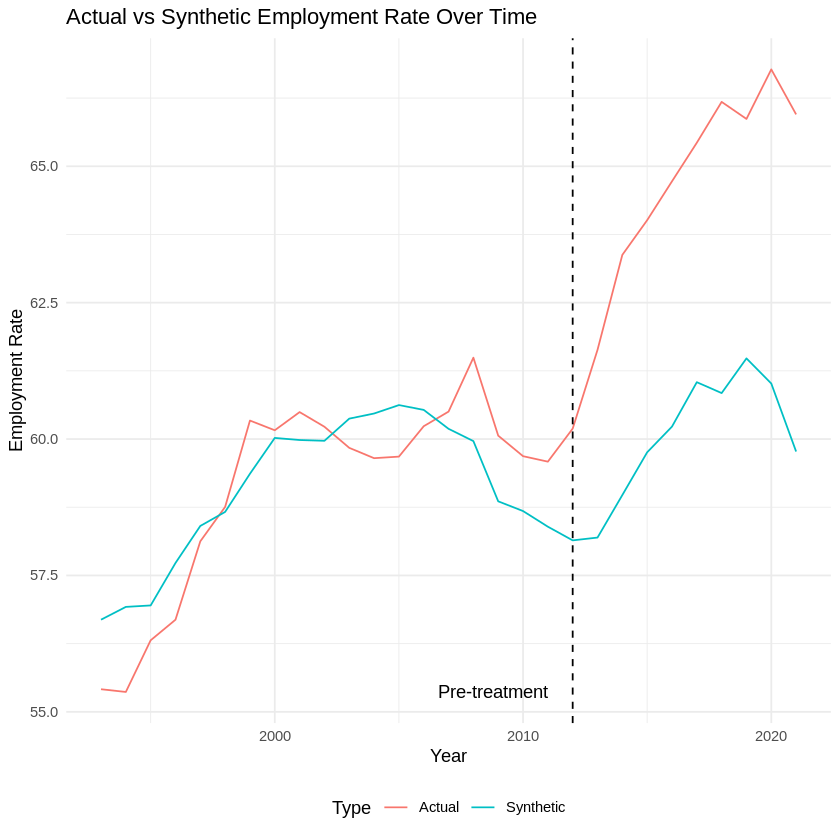

In [ ]:
# Generate the path plot data
path_data <- data.frame(
  Year = c(1993:2021),
  EmploymentRate = c(dataprep_out$Y1plot, dataprep_out$Y0plot %*% synth_out$solution.w),
  Type = factor(c(rep("Actual", length(dataprep_out$Y1plot)), rep("Synthetic", length(dataprep_out$Y1plot))), levels = c("Actual", "Synthetic"))
)

# Create the path plot without points and with a vertical line indicating pre-treatment period
ggplot(path_data, aes(x = Year, y = EmploymentRate, color = Type)) +
  geom_line(linewidth = 1) +
  geom_vline(xintercept = 2012, linetype = "dashed", color = "black", linewidth = 0.5) +
  theme_minimal() +
  labs(title = "Actual vs Synthetic Employment Rate Over Time",
       x = "Year",
       y = "Employment Rate",
       color = "Type") +
  theme(legend.position = "bottom") +
  annotate("text", x = 2011, y = min(path_data$EmploymentRate), label = "Pre-treatment", hjust = 1)

Warning message:
“Ignoring unknown parameters: linewidth”


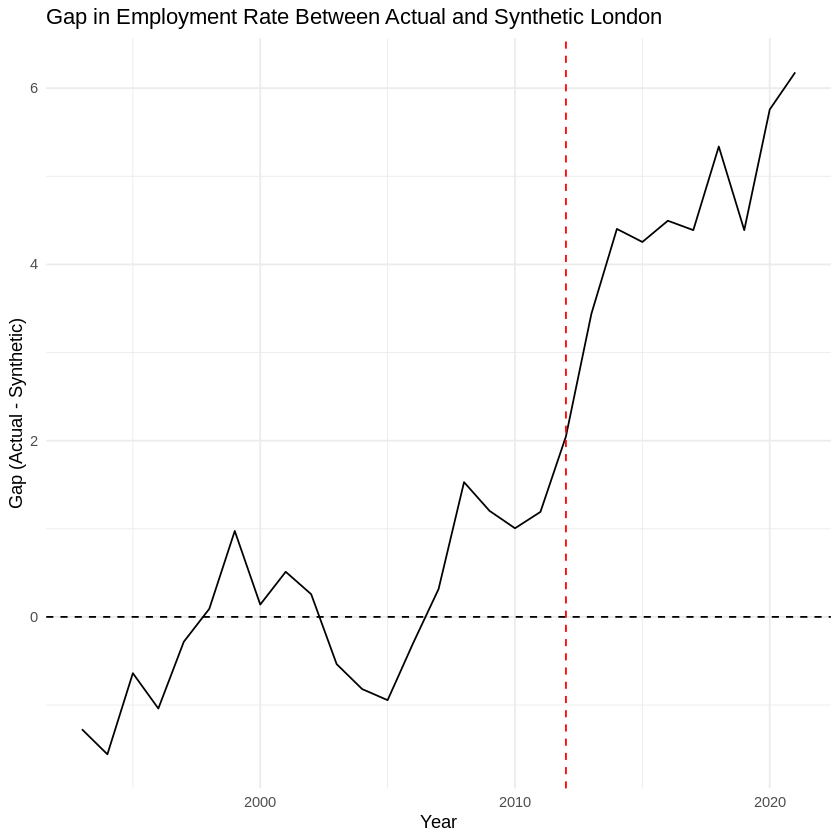

In [ ]:
# Calculate the actual and synthetic paths
actual_path <- dataprep_out$Y1plot
synthetic_path <- dataprep_out$Y0plot %*% synth_out$solution.w

# Calculate the gap between actual and synthetic employment rates
gap <- actual_path - synthetic_path

# Create a data frame for plotting the gap
gap_data <- data.frame(
  Year = as.numeric(rownames(actual_path)),
  Gap = as.vector(gap) # Convert to a vector to avoid dimensionality issues
)

# Generate the gap plot
gap_plot <- ggplot(gap_data, aes(x = Year, y = Gap)) +
  geom_line() +
  geom_hline(yintercept = 0, linetype = "dashed", color = "black") +
  geom_vline(xintercept = 2012, linetype = "dashed", color = "red", linewidth = 0.5) +
  theme_minimal() +
  labs(title = "Gap in Employment Rate Between Actual and Synthetic London",
       x = "Year",
       y = "Gap (Actual - Synthetic)")

# Display the plot
print(gap_plot)

# Sensitivity Analysis (re-running synthetic control with adjusted inputs)


In [ ]:
# Sensitivity analysis by varying predictors
predictor_sets <- list(
  c("total_economically_active"),
  c("economically_inactive_16_64"),
  c("total_economically_active", "economically_inactive_16_64", "unemployment_rate_16_64")
)

sensitivity_results <- lapply(predictor_sets, function(predictors) {
  # Prepare data with a new set of predictors
  dataprep_out <- dataprep(
    foo = dataset,
    predictors = predictors,
    predictors.op = "mean",
    dependent = "employment_rate",
    unit.variable = "RegionID",
    time.variable = "year",
    treatment.identifier = 1,
    controls.identifier = setdiff(1:9, 1),
    time.predictors.prior = c(1993:2011),
    time.optimize.ssr = c(1993:2011),
    time.plot = c(1993:2021)
  )

  # Run the synthetic control estimation
  synth_out <- synth(dataprep_out)

  # Calculate the gap between actual and synthetic employment rates
  actual_path <- dataprep_out$Y1plot
  synthetic_path <- dataprep_out$Y0plot %*% synth_out$solution.w
  gap <- actual_path - synthetic_path

  # Return a list containing the synthetic output and the gap
  list(synth_out = synth_out, gap = gap)
})

# to review the results to see if conclusions are consistent across different sets of predictors
sensitivity_results



X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 optimization over w weights: computing synthtic control unit 
 


**************** 
**************** 
**************** 

MSPE (LOSS V): 7.408194 

solution.v:
 1 

solution.w:
 0.03230587 0.04192255 0.02270087 0.05243251 0.7381585 0.0371188 0.03886242 0.03649845 


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 optimization over w weights: computing synthtic control unit 
 


**************** 
**************** 
**************** 

MSPE (LOSS V): 6.2187 

solution.v:
 1 

solution.w:
 1.51e-08 1.91e-08 1.11e-08 0.9999998 5.27e-08 1.66e-08 2.46e-08 2.32e-08 


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.7994576 

solution.v:
 0.6884184 0.3048099 0.006771793 

solution.w:
 1.003e-07 1.227e-07 7.76e-08 0.613925 0.3860743 1.082e-07 1.451e-07 1.

,w.weight
2,0.03230587
3,0.04192255
4,0.02270087
5,0.05243251
6,0.73815855
7,0.03711880
8,0.03886242
9,0.03649845
,1
1,7.408194



X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.7994576 

solution.v:
 0.4585101 0.2708314 0.2706585 

solution.w:
 1.309e-07 1.597e-07 9.74e-08 0.6139248 0.3860743 1.431e-07 1.82e-07 1.72e-07 



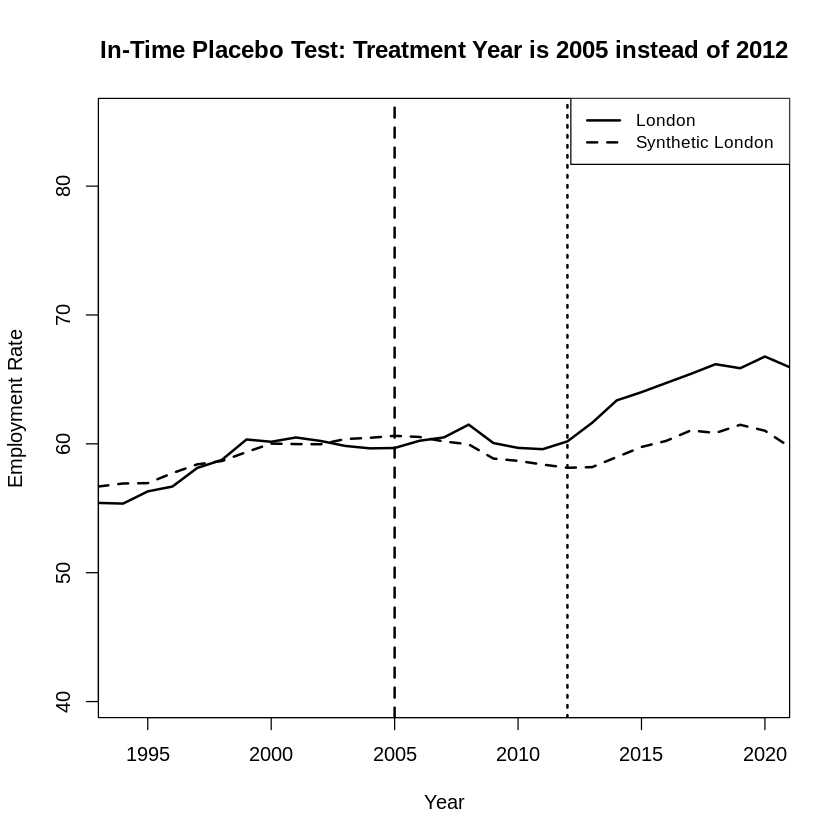

In [ ]:
# In-Time Placebo Test
dataprep_out1 <- dataprep(
  foo = dataset,
  predictors = c("total_economically_active", "total_in_employment", "economically_inactive_16_64"),
  predictors.op = "mean",
  dependent = "employment_rate",
  unit.variable = "RegionID",
  time.variable = "year",
  treatment.identifier = 1, # London
  controls.identifier = setdiff(1:9, 1), # All regions except London
  time.predictors.prior = c(1993:2011),
  time.optimize.ssr = c(1993:2011),
  time.plot = c(1993:2021)
)


# Run the synthetic control estimation
synth_out1 <- synth(dataprep_out1)

# Generate the results and path plot
path.plot(synth_out1, dataprep_out1,
         Ylab = "Employment Rate",
         Xlab = "Year",
         Main = "In-Time Placebo Test: Treatment Year is 2005 instead of 2012",
         Legend = c("London","Synthetic London"))
abline(v = 2005, lty = 2, lwd = 2)
abline(v = 2012, lty = 3, lwd = 2)




X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 10.35084 

solution.v:
 5.49e-08 0.9981511 0.001848844 

solution.w:
 0.0002281281 0.0001802787 0.0003122656 0.4126028 0.0002338168 0.4714207 0.1150219 



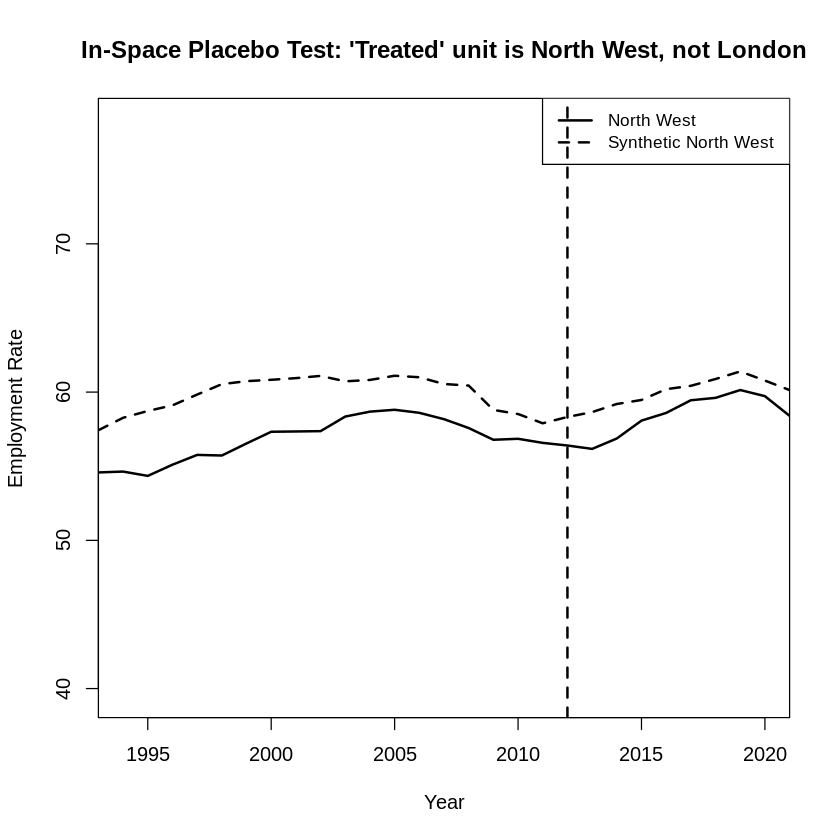

In [ ]:
#In-Space Placebo Test
dataprep_out2 <- dataprep(
  foo = dataset,
  predictors = c("total_economically_active", "total_in_employment", "economically_inactive_16_64"),
  predictors.op = "mean",
  dependent = "employment_rate",
  unit.variable = "RegionID",
  time.variable = "year",
  treatment.identifier = 5, # pretending that the treated unit is unit 2 (Liverpool)
  controls.identifier = c(2:4, 6:9),
  time.predictors.prior = c(1993:2011),
  time.optimize.ssr = c(1993:2011),
  time.plot = c(1993:2021)
)

# Run the synthetic control estimation
synth_out2 <- synth(dataprep_out2)

# Generate the results and path plot
path.plot(synth_out2, dataprep_out2,
         Ylab = "Employment Rate",
         Xlab = "Year",
         Main = "In-Space Placebo Test: 'Treated' unit is North West, not London",
         Legend = c("North West","Synthetic North West"))
abline(v = 2012, lty = 2, lwd = 2)